Our goal with this project was to use a file containing all of the known meteorite landings provided by NASA and figure out which state in the U.S has had the most landings.

Names:
Joseph Byington,
Jakob Esterowitz,
Bryce Hwang,

Emails:
jib56@bu.edu,
esto@bu.edu,
bryhwang@bu.edu,

In [ ]:
# Install pandas and download data from the internet
import pandas as pd
import matplotlib.pyplot as plt
# This is Meteor Landing Data from NASA
url = "https://data.nasa.gov/api/views/gh4g-9sfh/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)
# This is the Bounding boxes for the USA and each state
url_google = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vS7I6L1MSmT-DNjAQaMxybJBmjFc5sq0iBBxL5AgVuaHMWgZl8z3aT6B8d2cziMkw/pub?output=csv'
bds = pd.read_csv(url_google)
bds = bds.set_index('State')

In [ ]:
# Just get Latitude and Longitude from Meteors
my_col = ["reclat", 'reclong']
Heading = ('Meteor_Lat', 'Meteor_Long')
smaller = df[my_col]
smaller.columns = Heading

In [ ]:
# Creates a data set with all meteors inside the United States
min_lat = bds.loc['United States']['Min Lat']
min_long = bds.loc['United States']['Min Long']
max_lat = bds.loc['United States']['Max Lat']
max_long = bds.loc['United States']['Max Long']

usa_meteor = smaller.query('Meteor_Lat > @min_lat and Meteor_Lat < @max_lat and Meteor_Long > @min_long and Meteor_Long < @max_long')

In [ ]:
# Function that takes gps coordinates and returns the state where those coordinates are located
def is_state(lat, long):
    which_state = 'none'
    for state in bds.iloc[:-1].index:
        if lat > bds.loc[state]['Min Lat'] and lat < bds.loc[state]['Max Lat'] and long > bds.loc[state]['Min Long'] and long < bds.loc[state]['Max Long']:
            which_state = state
    return which_state
# Creates a dictionary with the count of each meteor landings in each state
count = {}
for meteor in usa_meteor.index:
    lat = usa_meteor.loc[meteor]['Meteor_Lat']
    long = usa_meteor.loc[meteor]['Meteor_Long']
    state = is_state(lat, long)
    if state != 'none':
        count[state] = count.get(state, 0)
        count[state] += 1

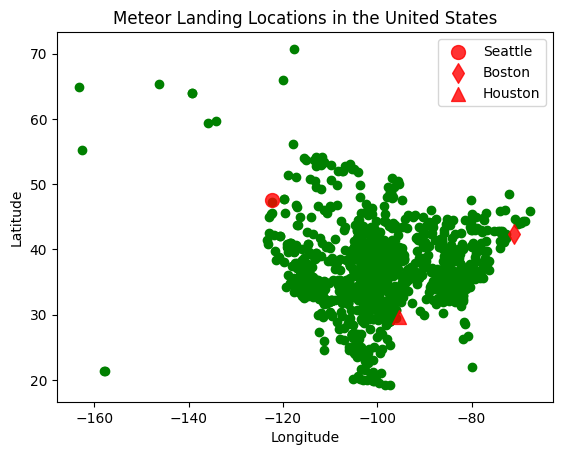

In [ ]:
# Collects all the Latitudes and Longitudes from every meteor landing in the USA
lats = []
longs = []
for points in usa_meteor['Meteor_Lat']:
    lats.append(points)
for points in usa_meteor['Meteor_Long']:
    longs.append(points)

# Plots the location of every meteor landing in the USA
plt.figure()
plt.scatter(longs, lats, c = 'green')

plt.scatter([-122.33], [47.6], c='red', s=100, marker='o', label='Seattle', alpha=0.8)       # Seattle, WA
plt.scatter([-71], [42.36], c='red', s=100, marker='d', label='Boston', alpha=0.8)           # Boston, MA
plt.scatter([-95.3], [29.7], c='red', s=100, marker='^', label='Houston', alpha=0.8)         # Houston, TX

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Meteor Landing Locations in the United States')
plt.legend()

Text(0.5, 1.0, 'States with most Meteor Landings')

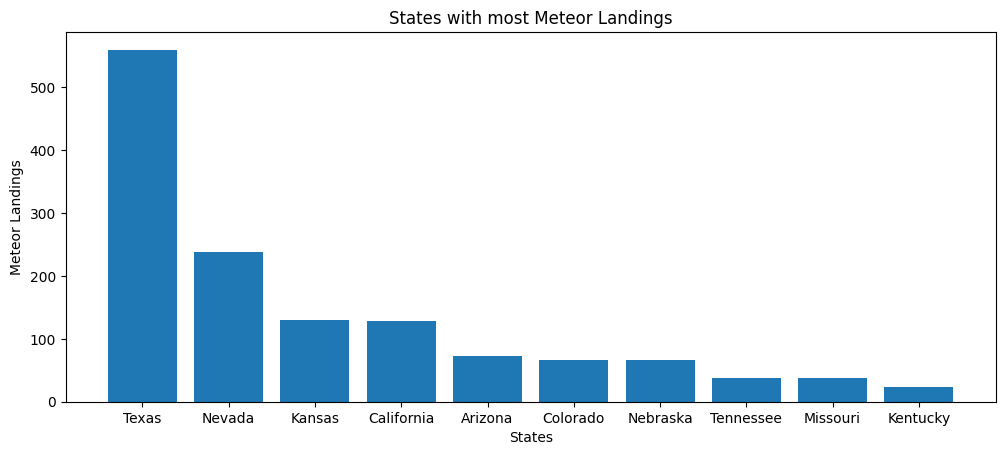

In [ ]:
# Creates a bar graph of the ten states with the most meteor landings
count_series = pd.Series(count)
count_df = pd.DataFrame(count_series, columns = ['Number of Meteor Landings'])

most_meteors = count_df.nlargest(10, 'Number of Meteor Landings')

plt.figure(figsize = (12,4.8))
plt.bar(most_meteors.index, most_meteors['Number of Meteor Landings'])
plt.xlabel('States')
plt.ylabel('Meteor Landings')
plt.title('States with most Meteor Landings')

In [ ]:
# Fun facts!

print(f'The state with the most meteor landings is {most_meteors.index.max()} with {most_meteors["Number of Meteor Landings"].max()} landings')
print(f'The state with the least meteor landings is {count_df.index.min()} with {count_df["Number of Meteor Landings"].min()} landing')

The state with the most meteor landings is Texas with 560 landings
The state with the least meteor landings is Alabama with 1 landing
